<h2 align="center"> Univariate Linear Regression </h2>

This aim of this project is to predict bike sales. Here, I build a univariate linear regression model in order to prdeict the sale of bikes based on population. I have explored all the fundamentals of Linear regression, with particular emphasis to the Gradient Descent concept.

### Load the Data and Libraries
----

In [1]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd  
import seaborn as sns 
plt.rcParams['figure.figsize'] = (12, 8)

In [3]:
data = pd.read_csv('bike_sharing_data.txt')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
Population    97 non-null float64
Profit        97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


In [4]:
# data.info()

### Visualize the Data
---

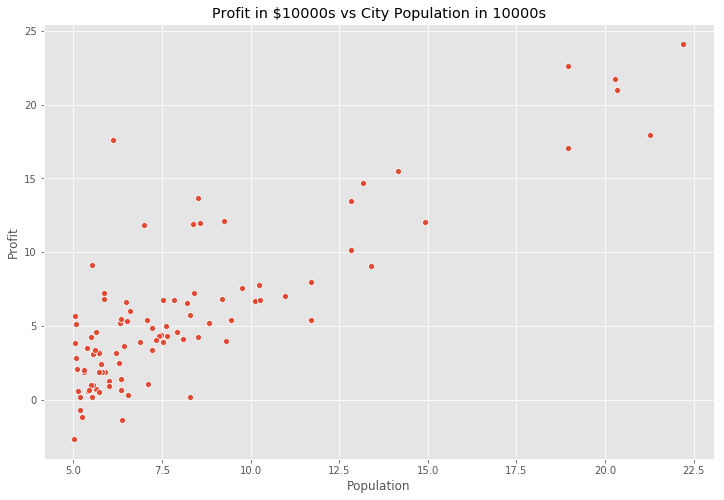

In [5]:
ax = sns.scatterplot(x='Population', y='Profit', data=data)
ax.set_title('Profit in $10000s vs City Population in 10000s');

### Compute the Cost $J(\theta)$
---

The objective of linear regression is to minimize the cost function

$$J(\theta) = \frac{1}{n} \sum_{i=1}^n (h_\theta(x^{(i)}) - y^{(i)} )^2$$

where $h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

In [6]:
n = data.Population.values.size
x = data.Population.values.reshape(n, 1)
x_transform = np.append(np.ones((n, 1)), x, axis=1)
y = data.Profit.values.reshape(n, 1)
theta = np.zeros((2,1))
# np.dot(x, theta) - y

In [7]:
def cost_function(x, y, theta):
    n = len(y)
    y_pred = np.dot(x_transform, theta)
    error = (y_pred - y) ** 2
    
    return (1/n) * np.sum(error)

cost_function(x, y, theta)

64.14546775491135

In [8]:
# n = data.Population.values.size
# x = np.append(np.ones((m, 1)), data.Population.values.reshape(m, 1), axis=1)
# y = data.Profit.values.reshape(m, 1)
# theta = np.zeros((2,1))

# cost_function(x, y, theta)
# np.ones((97,1))
# data.Population.values.reshape((97,1))
# print(x.shape)
# print(y.shape)
# print(theta.shape)
# np.dot(x, theta)
# y

###  Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat unitil convergence
        
$\theta_1 := \theta_1 - \alpha \frac{2}{n} \sum_{i=1}^n (h_{\theta}(x^{(i)}) - y^{(i)})x^{(i)}$ (simultaneously update $\theta_1$ for all $iterations$).

$\theta_0 := \theta_0 - \alpha \frac{2}{n} \sum_{i=1}^n (h_{\theta}(x^{(i)}) - y^{(i)})$ (simultaneously update $\theta_0$ for all $iterations$).

In [9]:
def gradient_descent(x, y, alpha, iterations):
    n = len(y)
    thetas = []
    costs = []
    theta = np.zeros((2,1))
    for i in range(iterations):
        y_pred = np.dot(x_transform, theta)
    
        error_1 = x * (y_pred - y)
        sum_error_1 = np.sum(error_1)
        deriv_cf_1 = (2/n) * sum_error_1
    
        error_0 = y_pred - y
        sum_error_0 = np.sum(error_0)
        deriv_cf_0 = (2/n) * sum_error_0
    
        deriv_cf = np.asarray([[deriv_cf_0],
                          [deriv_cf_1]])
    
        theta -= alpha * deriv_cf
        thetas.append(theta)
        costs.append(cost_function(x, y, theta))
    return theta, costs

In [10]:
np.asarray([[1],
           [2]])
theta, costs = gradient_descent(x , y, alpha=0.01, iterations=2000)

print('Linear regression function is:  y = {} + {}x1'.format(str(round(theta[0,0], 2)), str(round(theta[1,0], 2))))

Linear regression function is:  y = -3.89 + 1.19x1


In [11]:
# from numpy import std, var
# var(costs)

### Task 6: Visualising the Cost Function $J(\theta)$
---

In [12]:
from mpl_toolkits.mplot3d import Axes3D
np.array([[2,2],[2,2]])

array([[2, 2],
       [2, 2]])

In [22]:
theta_0 = np.linspace(-10, 10, 100)
theta_1 = np.linspace(-1, 4, 100)

cost_values = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t = np.array([theta_0[i], theta_1[j]])
        cost_values[i, j] = cost_function(x, y, t)
print(cost_values[0,2])
cost_values[0]

56172.2976989412


array([60219.58461953, 58175.79989188, 56172.29769894, 54209.07804071,
       52286.14091719, 50403.48632838, 48561.11427428, 46759.02475489,
       44997.21777021, 43275.69332024, 41594.45140498, 39953.49202442,
       38352.81517858, 36792.42086745, 35272.30909102, 33792.47984931,
       32352.9331423 , 30953.66897   , 29594.68733242, 28275.98822954,
       26997.57166137, 25759.43762791, 24561.58612916, 23404.01716512,
       22286.73073579, 21209.72684117, 20173.00548126, 19176.56665605,
       18220.41036556, 17304.53660978, 16428.9453887 , 15593.63670234,
       14798.61055068, 14043.86693374, 13329.4058515 , 12655.22730397,
       12021.33129116, 11427.71781305, 10874.38686965, 10361.33846096,
        9888.57258698,  9456.08924771,  9063.88844315,  8711.9701733 ,
        8400.33443815,  8128.98123772,  7897.910572  ,  7707.12244098,
        7556.61684468,  7446.39378308,  7376.4532562 ,  7346.79526402,
        7357.41980655,  7408.3268838 ,  7499.51649575,  7630.98864241,
      

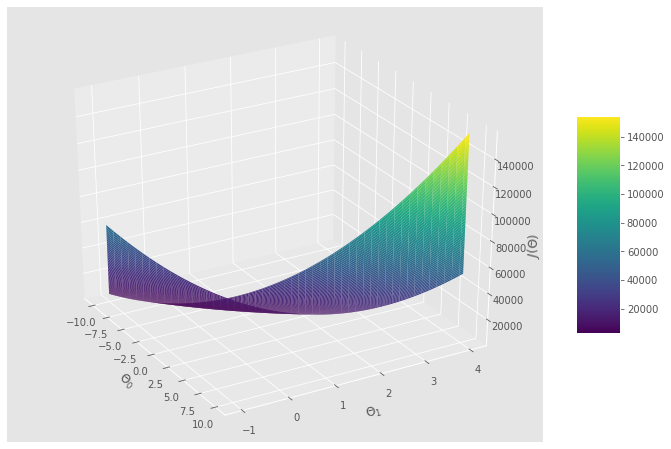

In [14]:
fig = plt.figure(figsize = (12, 8))
ax = fig.gca(projection = '3d')

surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap = 'viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.xlabel('$\Theta_0$')
plt.ylabel('$\Theta_1$')
ax.set_zlabel('$J(\Theta)$')
ax.view_init(30, 330)

plt.show()

### Task 7: Plotting the Convergence
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

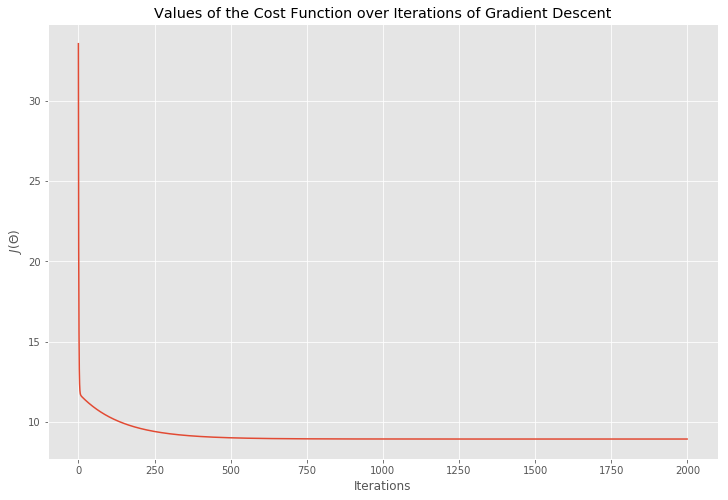

In [15]:
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('$J(\Theta)$')
plt.title('Values of the Cost Function over Iterations of Gradient Descent')
plt.show()

###  Training Data with Linear Regression Fit
---

In [23]:
theta.shape

(2, 1)

In [24]:
theta

array([[-3.8928815 ],
       [ 1.19274237]])

Text(0.5, 1.0, 'Linear Regression Fit')

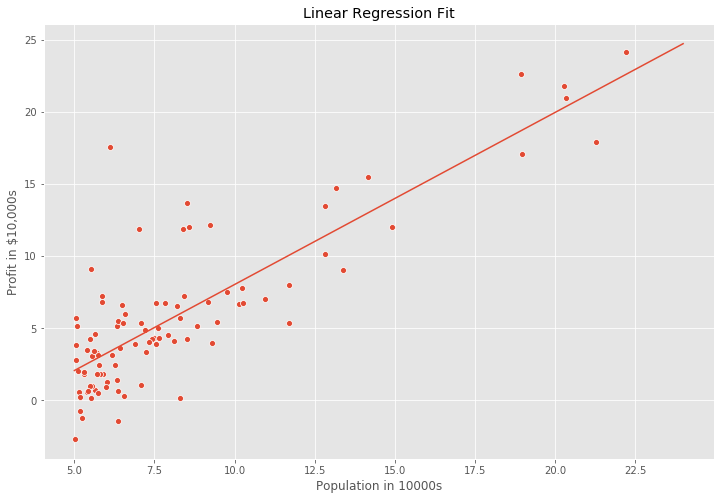

In [26]:
theta = np.squeeze(theta)
theta
sns.scatterplot(x='Population', y='Profit', data=data)

x_value = [x for x in range(5, 25)]
y_value = [((x * theta[1]) + theta[0]) for x in x_value]
sns.lineplot(x_value, y_value)

plt.xlabel('Population in 10000s')
plt.ylabel('Profit in $10,000s')
plt.title('Linear Regression Fit')

###  Inference using the optimized $\theta$ values
---

$h_\theta(x) = \theta^Tx$

In [27]:
def predict(x, theta):
    y_pred = np.dot(theta, x)
    return y_pred

In [28]:
y_pred_1 = predict(np.array([1,4]), theta) * 10000
print('For a population of 40,000 people, the model predicts a profit of $'
     + str(round(y_pred_1, 0)))

For a population of 40,000 people, the model predicts a profit of $8781.0


In [29]:
y_pred_2 = predict(np.array([1, 8.3]), theta) * 10000
print('For a population of 83,000 people, the model predicts a profit of $'
     + str(round(y_pred_2, 0)))

For a population of 83,000 people, the model predicts a profit of $60069.0
